# Smooth Curves

In [1]:
from typing import Optional
from numbers import Real, Complex
from pathlib import Path
import numpy as np
from numpy import pi, exp, cos, sin
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.matplotlib_fname()
plt.style.use("../../../mplstyles/math.mplstyle")

FIGURES_DIR = Path("../../figures/")

In [2]:
def plot_curve(
    gamma: [[Real], Complex],
    *,
    a: Real,
    b: Real,
    n_points: int = 1000,
    arrow_points: Optional[list[Real]] = None,
    arrow_dt: Real = 1e-5,
    color: str = "k",
    linewidth: float = 1.0,
    ax: Optional[plt.Axes] = None,
):
    # Create an Axes object if not provided
    if ax is None:
        ax = plt.gca()

    # A list of parameters
    ts = list(map(float, np.linspace(a, b, num=n_points)))

    # Complex numbers on the curve
    zs: list[Complex] = [gamma(t) for t in ts]

    # print(zs)

    # Real and imaginary parts
    xs = [z.real for z in zs]
    ys = [z.imag for z in zs]

    # Plot the curve
    ax.plot(
        xs,
        ys,
        color=color,
        linewidth=linewidth,
    )

    # Plot arrows in the direction of the curve
    if arrow_points is None:
        arrow_points = [(a + b) / 2]

    for t in arrow_points:
        z = gamma(t)
        x = z.real
        y = z.imag

        z_next = gamma(t + arrow_dt)
        dz = z_next - z
        dx = dz.real
        dy = dz.imag

        ax.annotate(
            "",
            # The arrow is drawn from `xytext` to `xy`
            xy=(x + dx, y + dy),
            xytext=(x, y),
            arrowprops=dict(
                arrowstyle="-|>",
                facecolor=color,
                edgecolor=color,
            ),
        )

    ax.set_xlabel("$\\mathrm{Re}(z)$")
    ax.set_ylabel("$\\mathrm{Im}(z)$")

    return gamma

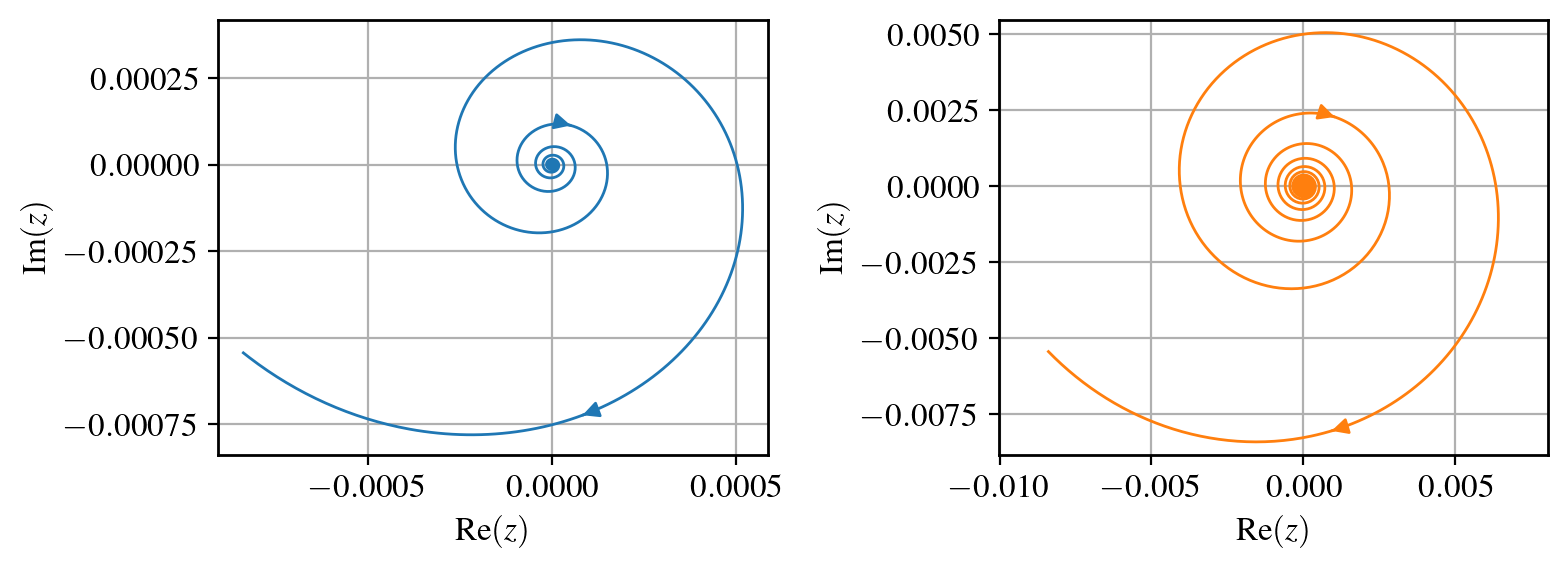

In [3]:
axs: list[plt.Axes]
fig, axs = plt.subplots(
    1,
    2,
    figsize=(8, 3),
)

a = 1e-5
b = 1e-1
arrow_points = [0.05, 0.09]

plot_curve(
    lambda t: t**3 * cos(1 / t) + 1j * t**3 * sin(1 / t),
    a=a,
    b=b,
    n_points=1000,
    arrow_points=arrow_points,
    color="C0",
    ax=axs[0],
)

plot_curve(
    lambda t: t**2 * cos(1 / t) + 1j * t**2 * sin(1 / t),
    a=a,
    b=b,
    arrow_points=arrow_points,
    color="C1",
    ax=axs[1],
)

plt.axis("equal")
plt.show()

fig.savefig(FIGURES_DIR.joinpath("two-spirals.png"))

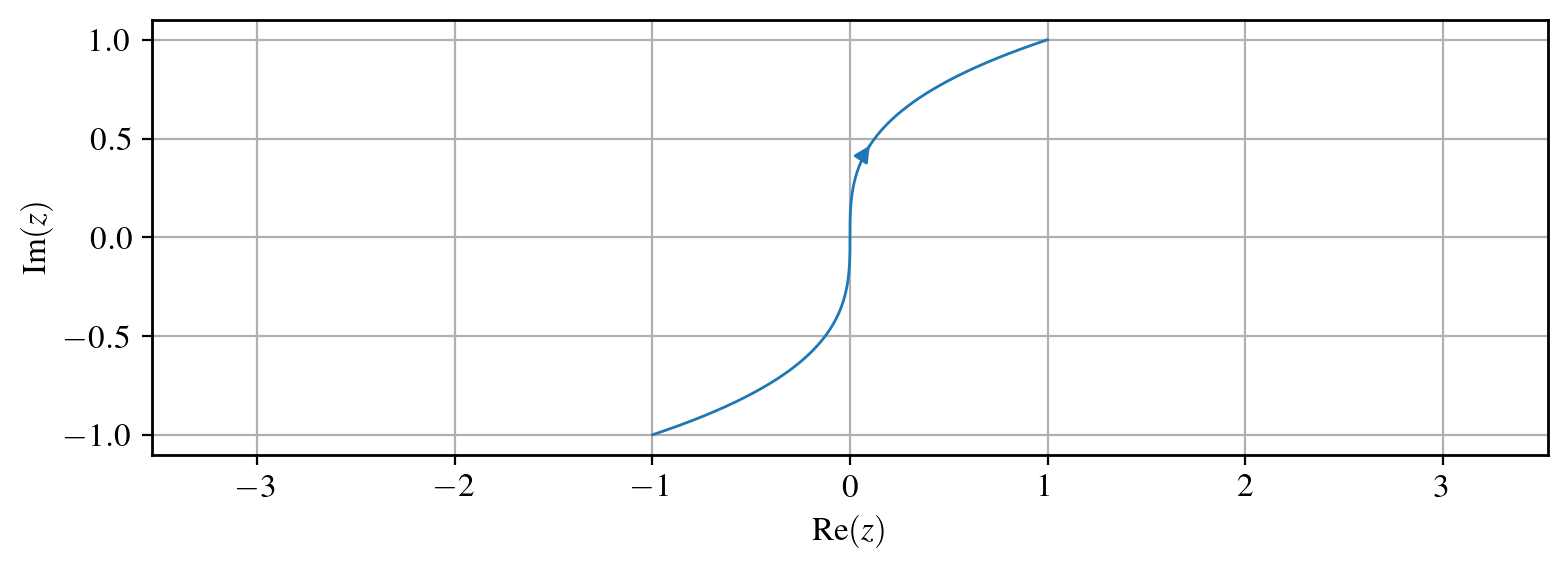

In [4]:
axs: list[plt.Axes]
fig, ax = plt.subplots(
    1,
    1,
    figsize=(8, 3),
)

a = -1
b = 1
arrow_points = [0.1]


g = plot_curve(
    lambda t: t + 1j * np.sign(t) * (np.abs(t) ** (1 / 3)),
    a=a,
    b=b,
    n_points=1000000,
    arrow_points=arrow_points,
    color="C0",
    ax=ax,
)

plt.axis("equal")
plt.show()